In [1]:
%plot -f svg -w 850
pkg load signal

graphics_toolkit("gnuplot")
set(groot,'defaultAxesXGrid','on')
set(groot,'defaultAxesYGrid','on')

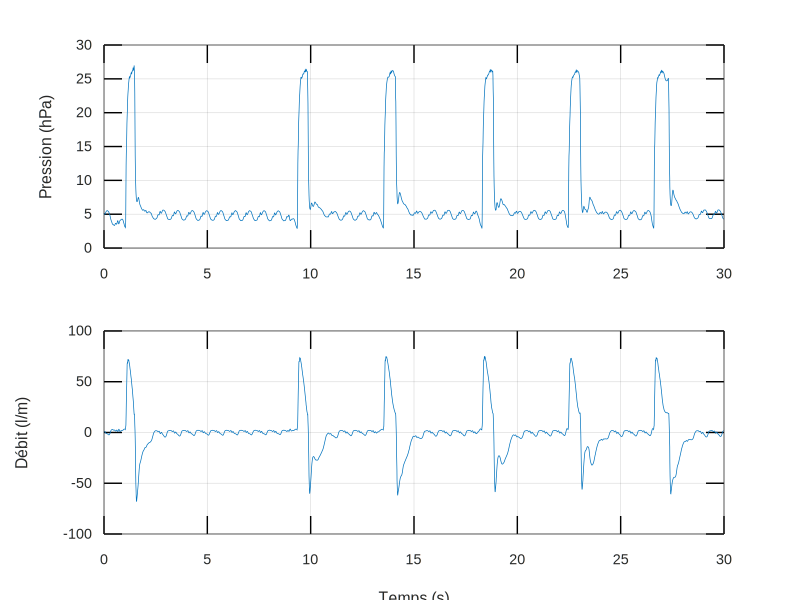

In [12]:
s = parsesu("../data/1648128876436.txt");
subplot(211)
plot(s.data.temps, s.data.pression)
ylabel("Pression (hPa)")
subplot(212)
plot(s.data.temps, s.data.debit)
ylabel("Débit (l/m)")
xlabel("Temps (s)")

In [3]:
ind = s.data.temps > 2.35 & s.data.temps < 9;
temps = s.data.temps(ind);
debit = s.data.debit(ind);
pression = s.data.pression(ind);

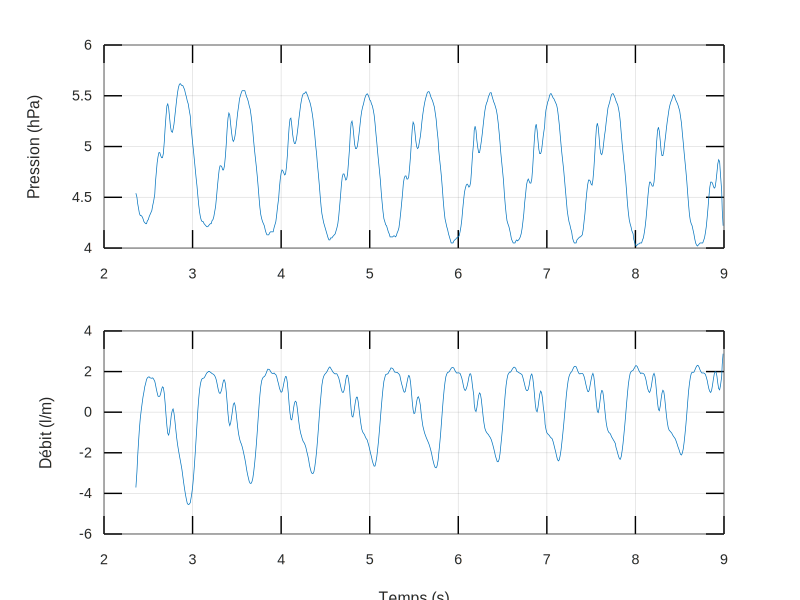

In [13]:
subplot(211)
plot (temps, pression);
ylabel("Pression (hPa)")
subplot(212)
plot (temps, debit);
ylabel("Débit (l/m)")
xlabel("Temps (s)")

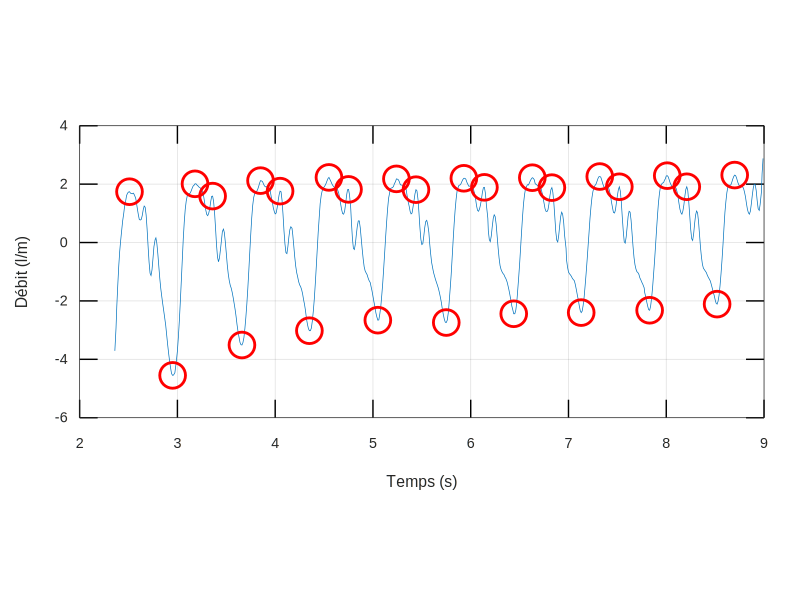

In [5]:
%plot -f svg -h 600
[peaks, loc] = findpeaks(debit, "MinPeakDistance", 18, "DoubleSided");
plot (temps, debit, temps(loc), peaks, "or")
pbaspect(gca(), [2 1 1])
ylabel("Débit (l/m)")
xlabel("Temps (s)")

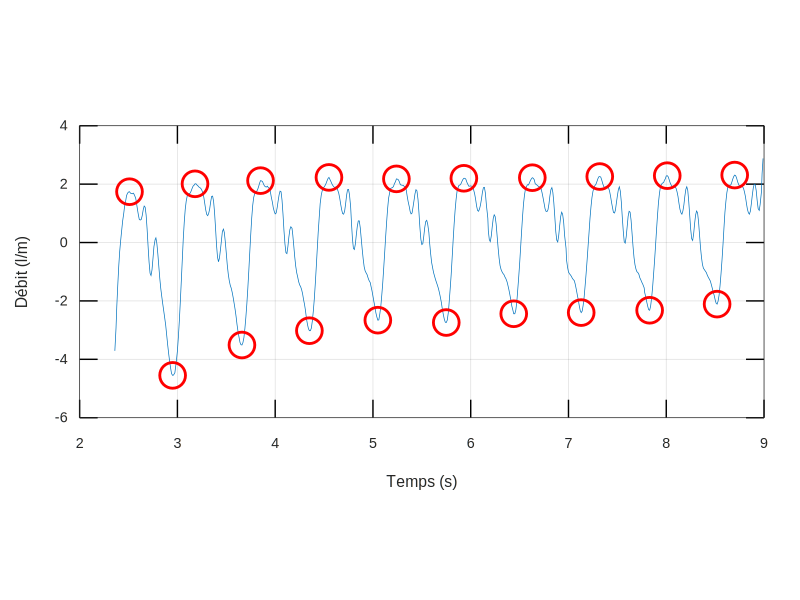

In [6]:
filtered = abs([2;diff(peaks)])>1;

pf = peaks(filtered);
lf = loc(filtered);

plot(temps, debit, temps(lf), pf, "or")
pbaspect([2 1 1])
ylabel("Débit (l/m)")
xlabel("Temps (s)")

In [7]:
abs(diff(pf))

ans =

   6.2900
   6.5600
   5.5200
   5.6300
   5.1400
   5.2500
   4.8900
   4.8400
   4.9200
   4.9400
   4.6400
   4.6600
   4.6200
   4.6600
   4.5800
   4.6100
   4.4000
   4.4200



In [8]:
ttop = temps(lf(pf>0));
periods = diff(ttop)';
freqs = 60./periods;
printf("%7s | %s\n", "Période", "Fréquence")
printf("%7s | %s\n", "-------", "---------")
printf("%6.2fs | %5.0f/min\n", [periods; freqs])

Période | Fréquence
------- | ---------
  0.67s |    90/min
  0.67s |    90/min
  0.70s |    86/min
  0.69s |    87/min
  0.69s |    87/min
  0.70s |    86/min
  0.69s |    87/min
  0.69s |    87/min
  0.69s |    87/min


In [9]:
printf("Fréquence moyenne: %.0f/min", mean(freqs));

Fréquence moyenne: 87/min

# Analyse du signal de pression

Amplitude moyenne des pulsations cardiaques: 1,4 hPa.

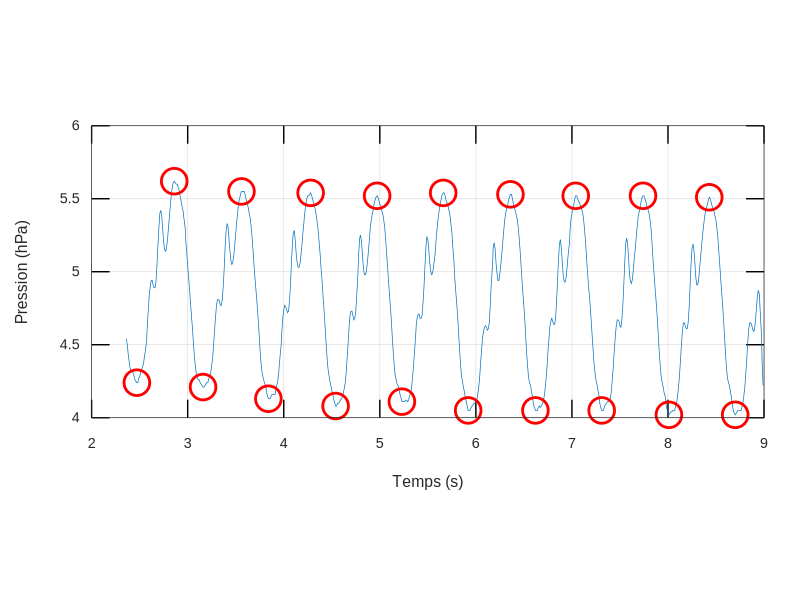

In [10]:
%plot -f svg -h 600
[peaks, loc] = findpeaks(pression, "MinPeakDistance", 18, "DoubleSided");
plot (temps, pression, temps(loc), peaks, "or")
pbaspect(gca(), [2 1 1])
xlabel("Temps (s)")
ylabel("Pression (hPa)")

In [11]:
deltas = abs(diff(peaks))
dmean = mean(deltas)

deltas =

   1.3800
   1.4100
   1.3400
   1.4200
   1.4100
   1.4600
   1.4400
   1.4100
   1.4300
   1.4900
   1.4800
   1.4800
   1.4700
   1.4700
   1.4700
   1.5000
   1.4900
   1.4900

dmean = 1.4467
